<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Descriptive Statistics and Visualizations

##### Boston Dataset Columns
The following describes the dataset variables:
 - CRIM - per capita crime rate by town
 - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS - proportion of non-retail business acres per town.
 - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 - NOX - nitric oxides concentration (parts per 10 million)
 - RM - average number of rooms per dwelling
 - AGE - proportion of owner-occupied units built prior to 1940
 - DIS - weighted distances to five Boston employment centres
 - RAD - index of accessibility to radial highways
 - TAX - full-value property-tax rate per \$10,000
 - PTRATIO - pupil-teacher ratio by town
 - LSTAT - % lower status of the population
 - MEDV - Median value of owner-occupied homes in \$1000's

##### Dataset exploration

In [31]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [32]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [33]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


##### Task "Median value of owner-occupied homes"

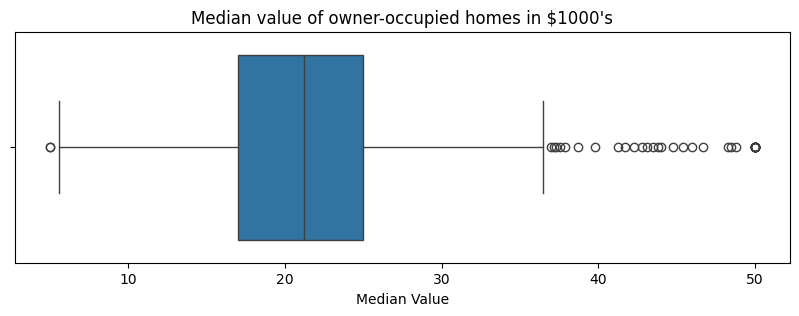

In [62]:
pyplot.figure(figsize=(10, 3))
sns.boxplot(boston_df['MEDV'], orient='h')
pyplot.title("Median value of owner-occupied homes in $1000's")
pyplot.xlabel('Median Value')
pyplot.ylabel('')
pyplot.show()

##### Task Provide a  bar plot for the Charles river variable

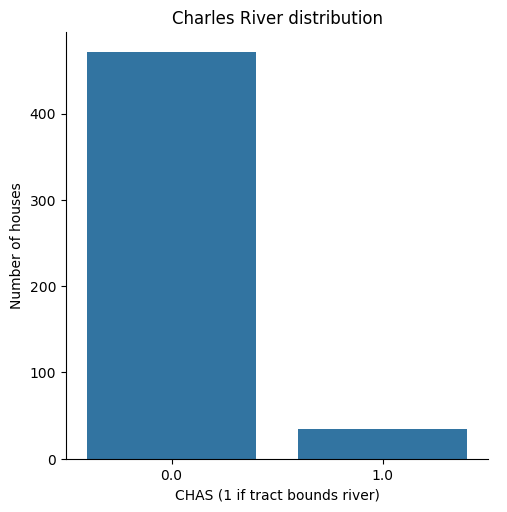

In [63]:
# sns.barplot(boston_df['CHAS'].value_counts())
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title('Charles River distribution')
pyplot.xlabel('CHAS (1 if tract bounds river)')
pyplot.ylabel('Number of houses')
pyplot.show()

##### Task Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [39]:
# Discretizing the age to age_group
age_less_than_35 = boston_df['AGE'] <= 35
age_between_35_and_70 = (boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)
age_above_70 = boston_df['AGE'] >= 70
boston_df.loc[age_less_than_35, 'AGE_GROUP'] = "Younger than 35"
boston_df.loc[age_between_35_and_70, 'AGE_GROUP'] = "Between 35 and 70"
boston_df.loc[age_above_70, 'AGE_GROUP'] = "Older than 70"
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Older than 70
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70


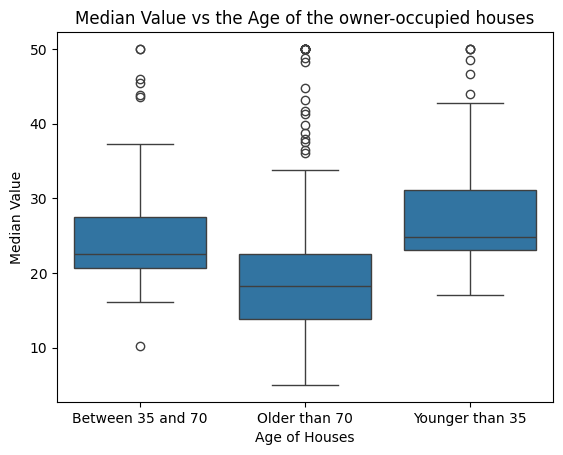

In [64]:
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Median Value vs the Age of the owner-occupied houses')
pyplot.xlabel('Age of Houses')
pyplot.ylabel('Median Value')
pyplot.show()

##### Task Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

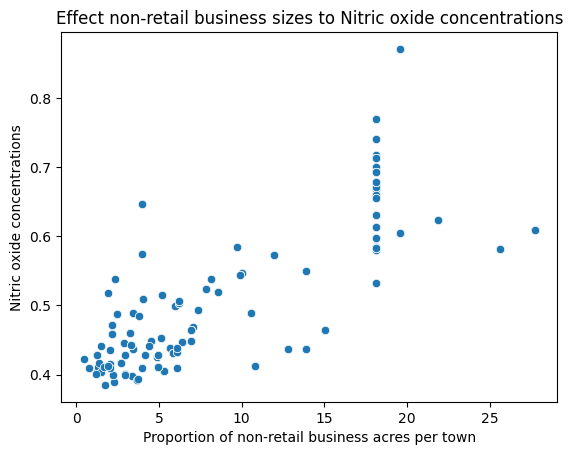

In [65]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Effect non-retail business sizes to Nitric oxide concentrations')
pyplot.xlabel('Proportion of non-retail business acres per town')
pyplot.ylabel('Nitric oxide concentrations')
pyplot.show()

According to the scatterplot we can see that as the size of the industry increases the NOX concentration increases.
Also if we calculate the correlation between the INDUS and NOX variables we see that it has a strong positive correlation. Which is expected from the graph

In [69]:
boston_df['INDUS'].corr(boston_df['NOX'])

0.7636514469209141

##### Task Create a histogram for the pupil to teacher ratio variable

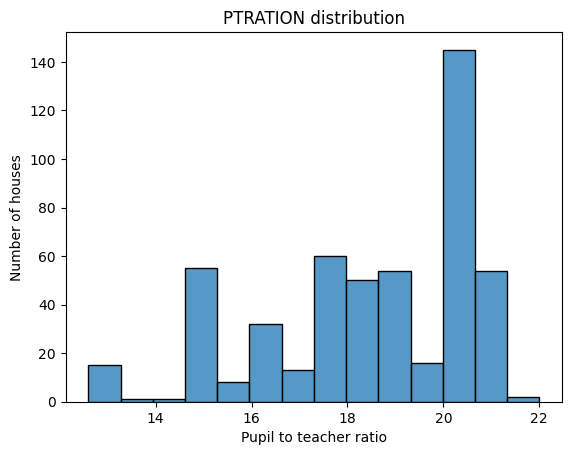

In [70]:
sns.histplot(x='PTRATIO', data=boston_df)
pyplot.title('PTRATION distribution')
pyplot.xlabel('Pupil to teacher ratio')
pyplot.ylabel('Number of houses')
pyplot.show()

#### Tests for Questions

##### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Let $\mu_{C}$ be the mean of Median Values of houses bounded by Charles River \
& $\mu_{NC}$ be the mean of Median Values of houses not bounded by Charles River

Hypothesis:

*   $H\_0: \mu_{C} = \mu_{NC}$ There is no difference between the Median Value of houses bound Charles rivers and those not bound by it
*   $H\_1: \mu_{C} ≠ \mu_{NC}$ There is a difference between the Median Value of houses bound Charles rivers and those not bound by it

In [73]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [76]:
# We need equal_var=False as from the levene test we see that variance is not equal
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since the pvalue is less than 0.05 we reject the Null Hypothesis $H_0$ and accept the Alternate Hypothesis $H_1$

**Conclusion**: There is a significant difference between the Median Value of houses bound by Charles River vs houses not bound by it

##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Let $\mu_{1}$ be the mean of Median Values of houses with age less than 35 \
& $\mu_{2}$ be the mean of Median Values of houses with age between 35 and 70 \
& $\mu_{3}$ be the mean of Median Values of houses with age 70 and older

Hypothesis:

*   $H\_0: \mu_{1} = \mu_{2} = \mu_{3}$ There is no difference between the Median Value of houses bound Charles rivers and those not bound by it
*   $H\_1:$ Atleast one mean is different

In [80]:
age_groups = boston_df['AGE_GROUP'].unique()
scipy.stats.levene(
    boston_df[boston_df['AGE_GROUP'] == age_groups[0]]['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == age_groups[1]]['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == age_groups[2]]['MEDV'],
    center='mean'
)

LeveneResult(statistic=2.78062002937483, pvalue=0.06295337343259205)

In [82]:
# Since variance is equal from levene test we can use f_oneway
age_groups = boston_df['AGE_GROUP'].unique()
scipy.stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == age_groups[0]]['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == age_groups[1]]['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == age_groups[2]]['MEDV'],
)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Since the pvalue is less than 0.05 we reject the Null Hypothesis $H_0$ and accept the Alternate Hypothesis $H_1$

**Conclusion** There is a significant evidence that atleast one of the means of the MEDV in three age groups is different

##### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

*   $H_0:$ There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H_1:$ There is correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

In [83]:
scipy.stats.pearsonr(
    boston_df['NOX'],
    boston_df['INDUS'],
)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Since the pvalue is less than 0.05 we reject the Null Hypothesis $H_0$ and accept the Alternate Hypothesis $H_1$

**Conclusion** There is a significant evidence of correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

##### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis:

*   $H_0:$ There is no correlation between distance to the five Boston employment centres and median value of owner occupied homes
*   $H_1:$ There is correlation between distance to the five Boston employment centres and median value of owner occupied homes

In [89]:
# X = boston_df['DIS']
# y = boston_df['MEDV']
# X = sm.add_constant(X)

# model = sm.OLS(y, X).fit()
model = ols('MEDV ~ DIS', data=boston_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        22:06:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since, p value is less than 0.05 we reject the Null Hypothesis $H_0$ and accept the Alternate Hypotheses $H_1$.

As R-squared is 0.062 so R = √0.062 = 0.2489 and coefficient of DIS is positive. So, as the distance increases the Median Value increases. \
**Conclusion**: We see that there is positive correlation between distance to Employment centres and Median Value of houses.